In [154]:
#!pip install -U scikit-learn

In [155]:
#!conda install scikit-learn

In [156]:
#!pip install delayed

In [157]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data = pd.read_csv('BDM Train Dataset')
test = pd.read_csv('BDM Test Dataset')

In [159]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [160]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [161]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [162]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [163]:
#Filling null values
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [164]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [165]:

data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [166]:
data.apply(lambda x: sum(x.isnull()))


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


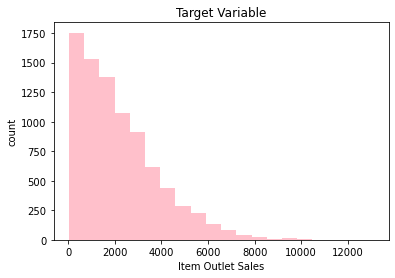

In [168]:
plt.hist(data['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

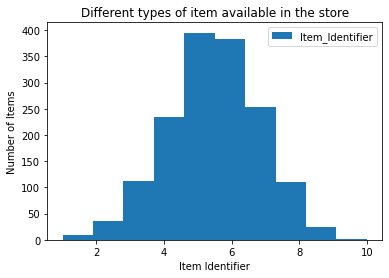

In [169]:

# analyzing only the data set

data['Item_Identifier'].value_counts(normalize = True)
data['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [170]:
# checking the different items in Item Fat Content

data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

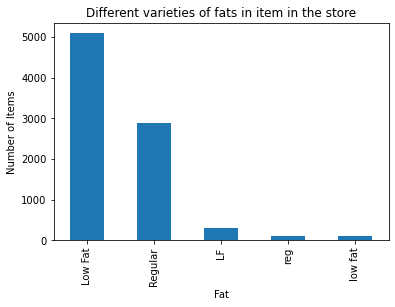

In [171]:

# checking different varieties of item fat content

data['Item_Fat_Content'].value_counts(normalize = True)
data['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [172]:
# checking unique values in the columns of the dataset

data.apply(lambda x: len(x.unique()))


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [173]:
# combining reg, Regular and Low Fat, low fat and, LF

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [174]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [175]:
# removing unnecassary columns from the dataset

data = data.drop('Item_Identifier', axis = 1)

print(data.shape)

(8523, 11)


In [176]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [177]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,664,4,5592,9,4,1,0,1,2540
1,57,1,880,14,473,3,8,1,2,2,422
2,376,0,715,10,2901,9,4,1,0,1,1639
3,393,1,0,6,4227,0,3,1,2,0,670
4,265,0,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3912,13,4955,1,1,0,2,1,2047
8519,233,1,3278,0,2023,7,5,1,1,1,516
8520,299,0,2302,8,1263,6,6,2,1,1,1018
8521,149,1,7175,13,1857,3,8,1,2,2,1466


In [178]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(8523, 43)


In [179]:
#Now lets start building the model
y = data['Item_Outlet_Sales']
X = data.drop(columns = ['Item_Outlet_Sales'])

In [180]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

C:\Users\nikit\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.014442e+00,Item_Weight
1,1.101151e+00,Item_Visibility
2,1.013309e+00,Item_MRP
3,inf,Outlet_Establishment_Year
4,1.481526e+06,Item_Fat_Content_Low Fat
5,2.747075e+06,Item_Fat_Content_Regular
6,3.087804e+05,Item_Type_Baking Goods
7,1.930572e+06,Item_Type_Breads
8,4.906509e+05,Item_Type_Breakfast
9,6.712972e+05,Item_Type_Canned


The VIF looks much better. So now we can go ahead and train the model

In [183]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [184]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [185]:
regression.score(x_train,y_train)

0.5590538508234304

In [186]:
regression.score(x_test,y_test)

0.5762219081694236

In [187]:
y_pred = regression.predict(x_test)

In [188]:
r2_score(y_test,y_pred)

0.5762219081694236

Note: We got the test score of 57.62% from the multiple linear regression model 

# Regularization

In [189]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [190]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [191]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.14961722885900053

In [192]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16468422.787072182, tolerance: 1868915.7240007515
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.14961722885900053)

In [193]:
lasso_reg.score(x_test,y_test)

0.5762367296200253

In [194]:
#Lasso regression model's score has decreased than that of linear regression model

In [195]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.84023526, 0.49031146, 4.38099296, 0.14926045, 7.67194486,
       6.8419945 , 9.44292299, 0.22759353, 0.79739397, 0.40789333,
       9.93739665, 0.22179869, 6.7632306 , 0.62406552, 0.15181599,
       7.51859093, 3.87676861, 3.57104384, 6.01704786, 1.31329477,
       4.14899458, 1.61283814, 7.13202199, 9.34349133, 2.43740505,
       2.44401299, 2.22200218, 7.0467548 , 8.60638893, 0.15909862,
       9.71725723, 9.98749083, 3.50301324, 1.05809835, 4.79887624,
       9.93956913, 8.14533799, 1.05835848, 6.37825353, 6.90014429,
       4.69210775, 3.28614692, 2.15685299, 1.43998433, 5.99391985,
       6.72602702, 8.27778325, 9.97332114, 1.42264037, 8.00197076]),
        cv=10, normalize=True)

In [196]:
ridgecv.alpha_

0.14926044519124937

In [197]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.14926044519124937)

In [198]:
ridge_model.score(x_test,y_test)

0.576201393921072

In [199]:
# So using Ridge regression model as the difference is infinitesimely small

In [201]:
import pickle
big_data = 'finalized_model.pickle'
pickle.dump(ridge_model,open(big_data,'wb'))